In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets as dat
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics as met
from matplotlib import pyplot as plt
from sklearn import model_selection as mod

**We will be using 2 different datasets:**


*   **HTRU2 Data Set** (For Classification): Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery. [Detail](https://archive.ics.uci.edu/ml/datasets/HTRU2) - [Download Dataset](https://drive.google.com/open?id=1vDIoPN14zDVjSnh58yC8_P0vICdmUhfp)


*   **California Housing Prices** (For Regression): The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning. [Detail](https://www.kaggle.com/camnugent/california-housing-prices/home) - [Download Dataset](https://drive.google.com/open?id=1TMiLEOcCEcvKMmy3zrdUVN1AXKDe6qQ_) Note: I made a small modification on the original dataset, headers were added to the csv file. So please use "Download Dataset" link.



# Classification

First read HTRU_2.csv and display first 5 rows

In [3]:
htru2 = pd.read_csv("HTRU_2.csv")
htru2.head()

,mean,std,excess_kurtois,skewness,mean_DM-SNR,std_DM-SNR,excess_kurtois_DM-SNR,skewness_DM-SNR,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Let's see the shape of the data

In [4]:
htru2.shape

(17898, 9)

Calculate base accuracy (ie. what is the accuracy if you predit the majority class all the time?). Note that `class` column will be our target.

In [12]:
len(htru2[htru2["class"]==htru2["class"].value_counts().idxmax()]) / len(htru2)

0.908425522404738

Split data into train/test with `test_size 0.33` and `random_state=42`

In [14]:
X = htru2.drop(["class"],axis=1)

In [30]:
y = htru2["class"]

In [16]:
X.shape

(17898, 8)

In [31]:
y.shape

(17898,)

In [18]:
X.head()

,mean,std,excess_kurtois,skewness,mean_DM-SNR,std_DM-SNR,excess_kurtois_DM-SNR,skewness_DM-SNR
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [20]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.33, random_state=42) 

Now plot learning curve of the Decision Tree estimator with default parameters (just set `random_state=42`). y axis should represent accuracy score.

In [21]:
def plotLearningCurveClassifierAccuracy(est, X_train, y_train, X_test, y_test, n_iter=10, minY=0,maxY=1):
    x_values = [] #number of training samples
    y_values_train = []
    y_values_test = []

    for i in np.linspace(10,len(X_train),n_iter): #increase training sizes by every iter
        i=int(i)
        #select a subset of training data
        X_train_temp = X_train[:i]
        y_train_temp = y_train[:i]
        #create the model
        est.fit(X_train_temp, y_train_temp)
        #evaluate train set
        y_pred_train=est.predict(X_train_temp)
        train_score = met.accuracy_score(y_train_temp,y_pred_train)
        #evaluate test set
        y_pred_test=est.predict(X_test)
        test_score = met.accuracy_score(y_test,y_pred_test)
        #populate lists
        y_values_train.append(train_score)
        y_values_test.append(test_score)
        x_values.append(i)
    plt.figure(figsize=(10,6))
    plt.plot(x_values,y_values_train,label="Train")
    plt.plot(x_values,y_values_test, label="Test")
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("# of training samples")
    plt.grid(True)
    plt.ylim(minY,maxY)
    plt.show()



In [22]:
dct_tree = tree.DecisionTreeClassifier(random_state=42)
dct_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

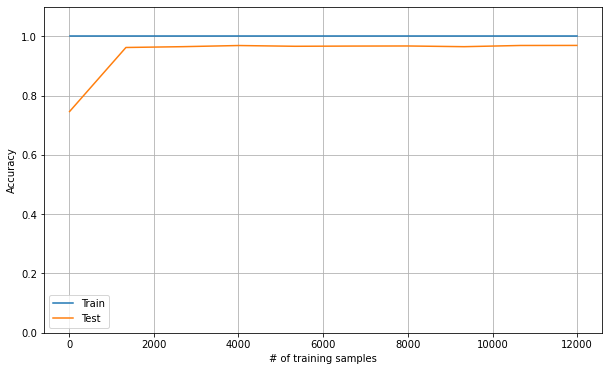

In [25]:
plotLearningCurveClassifierAccuracy(dct_tree, X_train, y_train, X_test, y_test, maxY=1.1)

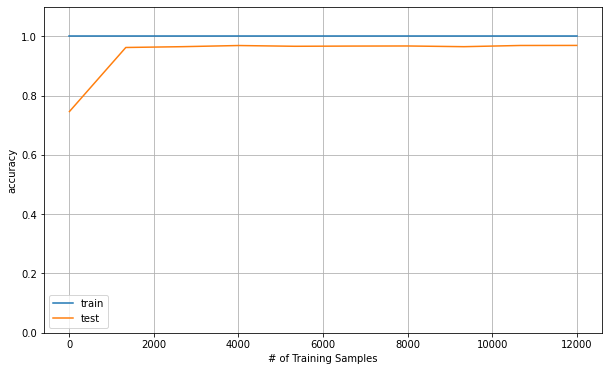

Re-draw learning curve. Now, y axis should represent f1-score.

In [26]:
def plotLearningCurveClassifierF1(est, X_train, y_train, X_test, y_test, n_iter=10, minY=0,maxY=1):
    x_values = [] #number of training samples
    y_values_train = []
    y_values_test = []

    for i in np.linspace(10,len(X_train),n_iter): #increase training sizes by every iter
        i=int(i)
        #select a subset of training data
        X_train_temp = X_train[:i]
        y_train_temp = y_train[:i]
        #create the model
        est.fit(X_train_temp, y_train_temp)
        #evaluate train set
        y_pred_train=est.predict(X_train_temp)
        train_score = met.f1_score(y_train_temp,y_pred_train)
        #evaluate test set
        y_pred_test=est.predict(X_test)
        test_score = met.f1_score(y_test,y_pred_test)
        #populate lists
        y_values_train.append(train_score)
        y_values_test.append(test_score)
        x_values.append(i)
    plt.figure(figsize=(10,6))
    plt.plot(x_values,y_values_train,label="Train")
    plt.plot(x_values,y_values_test, label="Test")
    plt.legend()
    plt.ylabel("F1 Score")
    plt.xlabel("# of training samples")
    plt.grid(True)
    plt.ylim(minY,maxY)
    plt.show()


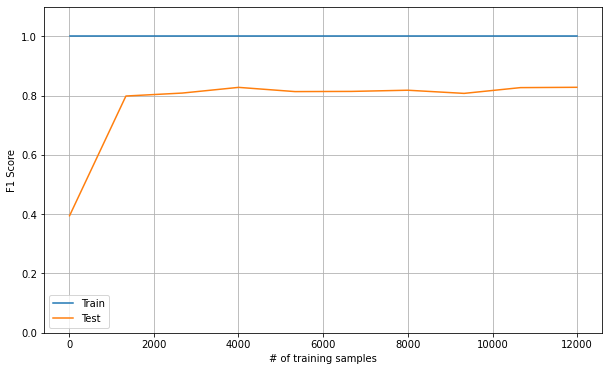

In [27]:
plotLearningCurveClassifierF1(dct_tree, X_train, y_train, X_test, y_test, maxY=1.1)

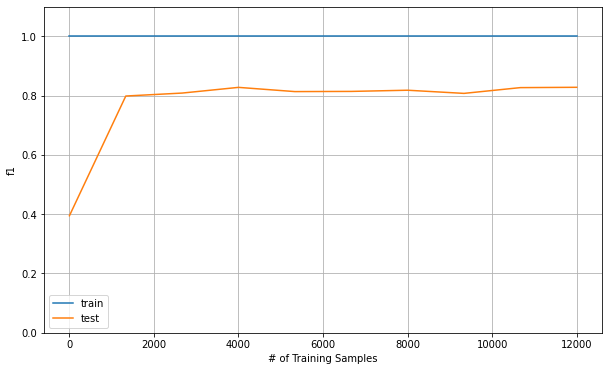

In [28]:
def plotDecisionBoundaries(clf, X, y, n_classes=2):
  # Parameters
  plot_colors = "rb"
  plot_step = 0.02

  X2 = X.values
  y_now = y.values


  for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                  [1, 2], [1, 3], [2, 3]]):
      # We only take the two corresponding features
      X_now = X2[:, pair]
      
      

      # Train
      clf.fit(X_now, y_now)

      # Plot the decision boundary
      plt.subplot(2, 3, pairidx + 1)

      x_min, x_max = X_now[:, 0].min() - 1, X_now[:, 0].max() + 1
      y_min, y_max = X_now[:, 1].min() - 1, X_now[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
      plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

      

      # Plot the training points
      for i, color in zip(range(n_classes), plot_colors):
          idx = np.where(y_now == i)
          
          plt.scatter(X_now[idx, 0], X_now[idx, 1], c=color,
                      cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

  plt.suptitle("Decision surface of a decision tree using paired features")
  plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  plt.axis("tight")
  plt.show()

Plot the decision boundaries of Decision Tree with default parameters by using the given function above. It will plot some different charts for different feature pairs.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


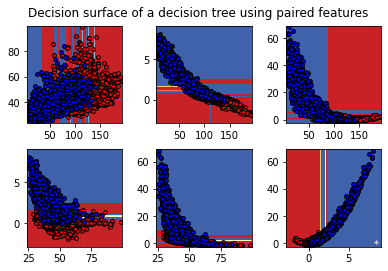

In [32]:
plotDecisionBoundaries(dct_tree, X, y, n_classes=2)

No handles with labels found to put in legend.


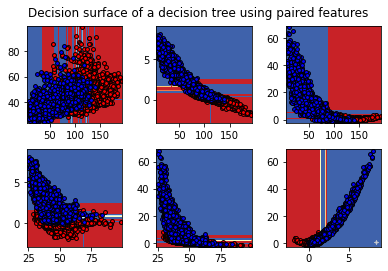

There are different ways to overcome overfitting problem in Decision Trees. We can set a maximum depth for the tree or we can set a minimum number of instance requirement to split a node.

Below, let's first `limit the depth of the tree` and see how it affects learning curve in terms of accuracy and f1_score.

In [33]:
dct_tree2 = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
dct_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

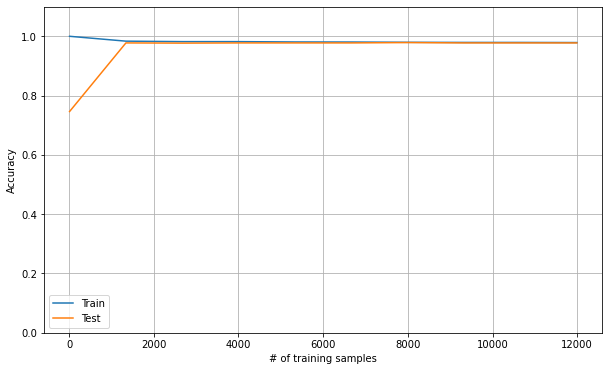

In [34]:
plotLearningCurveClassifierAccuracy(dct_tree2, X_train, y_train, X_test, y_test, maxY=1.1)

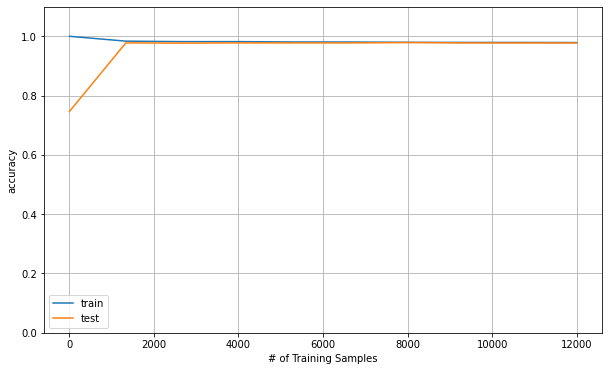

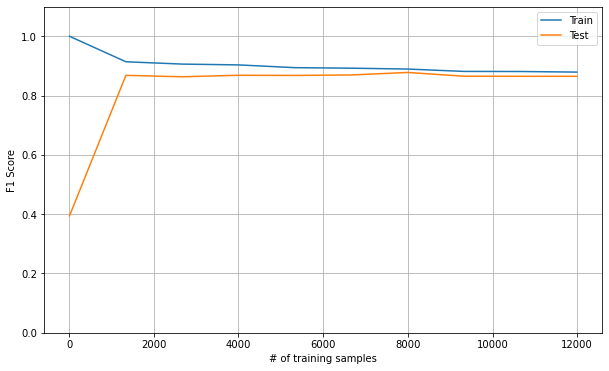

In [35]:
plotLearningCurveClassifierF1(dct_tree2, X_train, y_train, X_test, y_test, maxY=1.1)

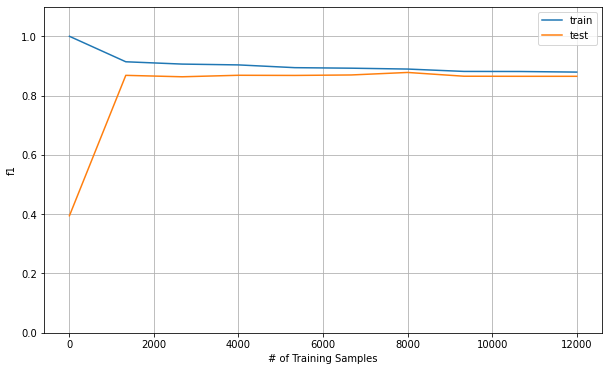

Now, let's set a minimum number of instance requirement to split a node:

In [42]:
dct_tree3 = tree.DecisionTreeClassifier(random_state=42, min_samples_split=10)
dct_tree3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10, random_state=42)

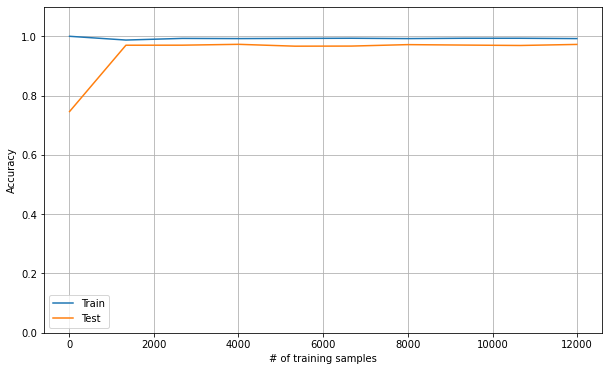

In [43]:
plotLearningCurveClassifierAccuracy(dct_tree3, X_train, y_train, X_test, y_test, maxY=1.1)

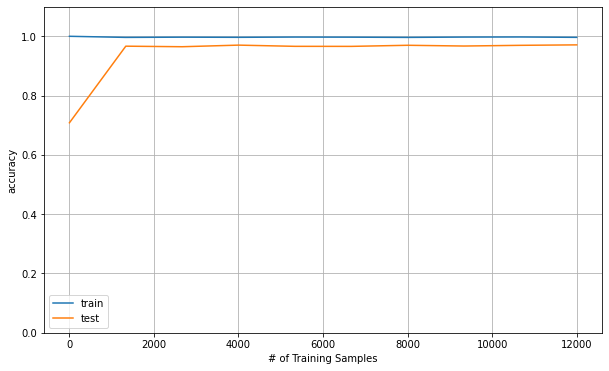

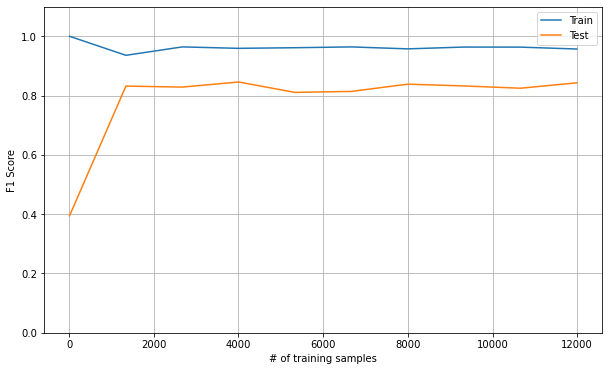

In [44]:
plotLearningCurveClassifierF1(dct_tree3, X_train, y_train, X_test, y_test, maxY=1.1)

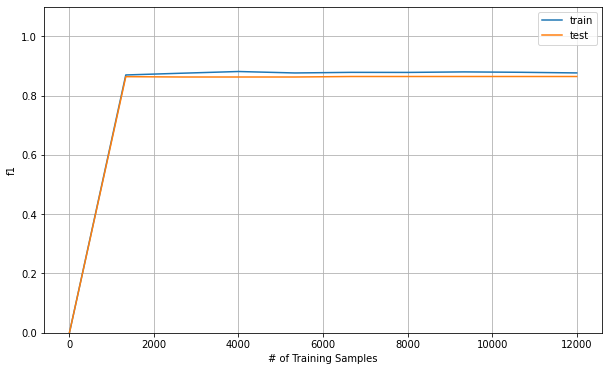

Now, both limit the depth and set min number to split a node and see the learning curves

In [45]:
dct_tree4 = tree.DecisionTreeClassifier(random_state=42, min_samples_split=10, max_depth=3)
dct_tree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)

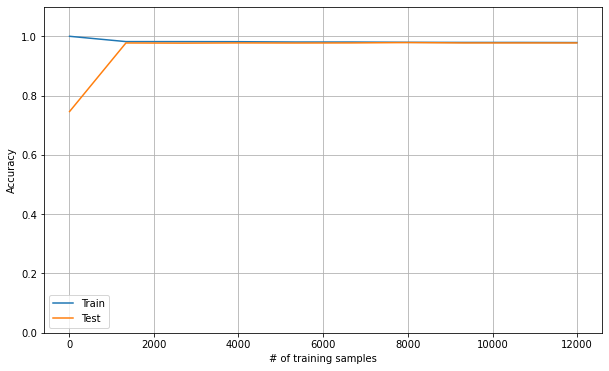

In [46]:
plotLearningCurveClassifierAccuracy(dct_tree4, X_train, y_train, X_test, y_test, maxY=1.1)

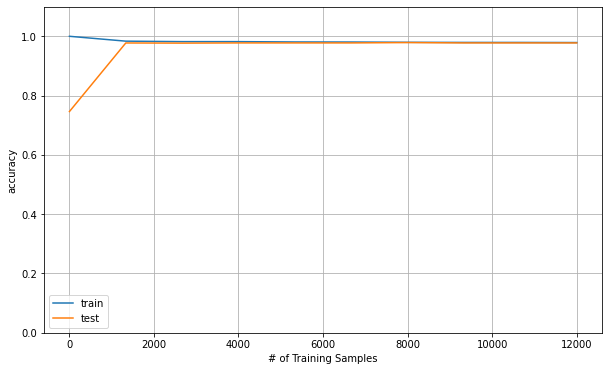

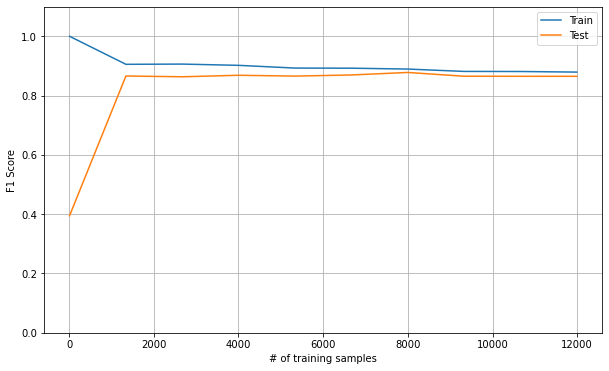

In [47]:
plotLearningCurveClassifierF1(dct_tree4, X_train, y_train, X_test, y_test, maxY=1.1)

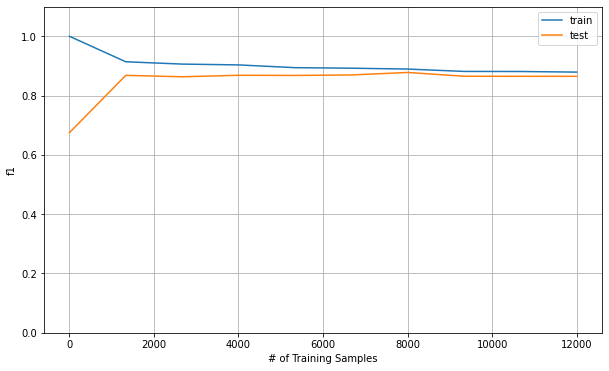

**When we limit the tree, then we can prevent overfitting. We can also observe it from the decision boundaries as below:**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


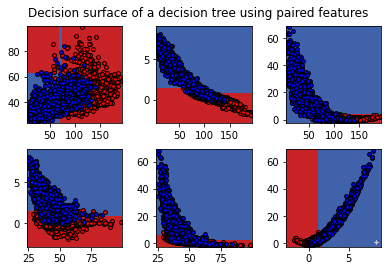

In [48]:
plotDecisionBoundaries(dct_tree4, X, y, n_classes=2)

No handles with labels found to put in legend.


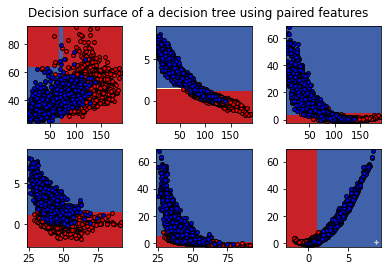

Now, we can play with the parameters and compare the results. For instance, let's try with different `max_depth` values and see the average f1-score after cross validation (where `cv=5`). Use default value for `min_samples_split` and set `random_state` as 42 for this experiment. You will probably see that, as you increase `max_depth` value too much, the f1-score will be getting worse.

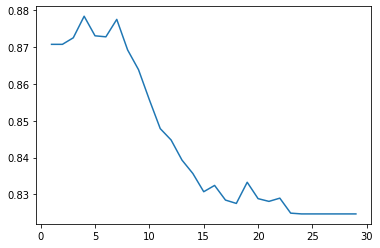

Now select an appropriate max_depth value based on your analysis, and test it on test dataset in terms of f1-score as well.

# Regression

In [ ]:
housing = pd.read_csv("/content/housing.csv")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We have some missing values, let's drop these rows (we don't know how to deal with them for now).

In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

First of all, let's drop `ocean_proximity` column since we don't know how to deal with categorical features yet.

In [ ]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


When we plot a chart using the longitude and latitude, we see that the houses near the ocean is more expensive than the others (check California map). We probably dropped one of the most important features (`ocean_proximity`). But, anyway...

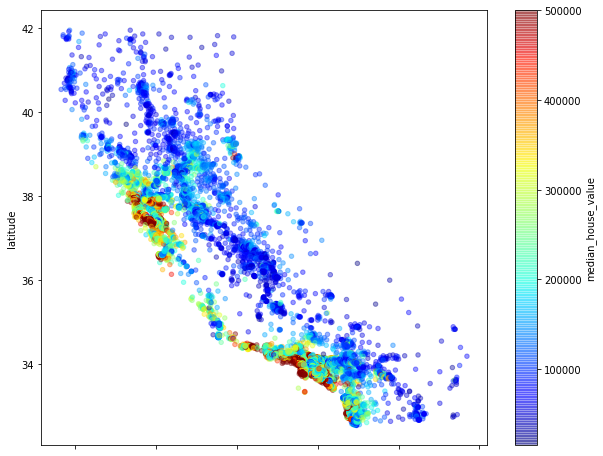

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             figsize=(10, 8))

plt.show()

`median_house_value` will be our target. Let's split our data into train/test with test_size 0.33 and random_state=42


Find best parameters (`max_depth` and `min_samples_split`) for Decision Tree using grid search. 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [10, 20],
                         'min_samples_split': [40, 50, 60]},
             scoring='neg_root_mean_squared_error')

Check the best parameters

{'max_depth': 20, 'min_samples_split': 60}

Check the best score

-61224.30792442117

Apply the best estimator on test data and see the rmse score

60336.79466000861